[View in Colaboratory](https://colab.research.google.com/github/freesemt/stewart-acid-base-model/blob/master/notebooks/fig_06.ipynb)

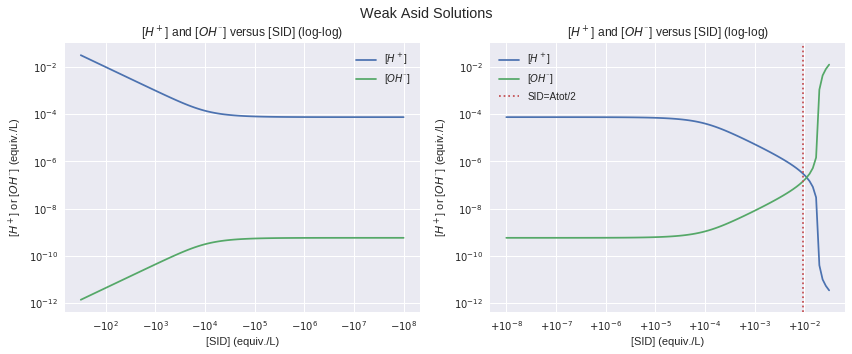

In [3]:
import numpy                as np
import matplotlib.pyplot    as plt
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append('local_modules/OurUtils')
from StewartModel import Fh, Kw
Atot = 0.019

fig = plt.figure( figsize=(12, 5) )
fig.suptitle( "Weak Asid Solutions" )

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
SID = np.logspace(-8, -1.5, 100 )
for k, ax in enumerate([ax1, ax2]):
    ax.set_title( "[$H^+$] and [$OH^⁻$] versus [SID] (log-log)" )
    ax.set_xlabel( '[SID] (equiv./L)' )
    ax.set_ylabel( '[$H^+$] or [$OH^⁻$] (equiv./L)' )
    fmt = '$-10^{%d}$' if k == 0 else '$+10^{%d}$'
    ax.xaxis.set_major_formatter(FormatStrFormatter(fmt))
    ax.yaxis.set_major_formatter(FormatStrFormatter('$10^{%d}$'))
    if k == 0:
        logx = -np.log10(SID)
        x_  = -SID
    else:
        logx = np.log10(SID)
        x_  = SID
    H   = Fh(x_, Atot)
    OH  = Kw/H
    ax.plot( logx, np.log10( H ), label='[$H^+$]' )
    ax.plot( logx, np.log10( OH ), label='[$OH^⁻$]' )

    if k == 0:
        ymin, ymax = ax.get_ylim()
    else:
        ax.set_ylim(ymin, ymax)
        x   = np.log10( Atot/2 )
        ax.plot( [x, x], [ymin, ymax], ':', label='SID=Atot/2' )

    ax.legend()
fig.tight_layout()
fig.subplots_adjust( top=0.88 )

plt.show()
